In [90]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt



# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from Funcs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup
We consider a set of random points in the unit square:
$$\chi = \{(x_1,x_2)|x_1\sim U(0,1)x_2\sim U(0,1)\}$$
For these points we know the value of some function $f(x_1,x_2):
$$\mathcal{F}=\{f(x_1,x_2)|(x_1,x_2)\in\chi\}$$



In [91]:
# First we draw the points as desribed in the question.
rng = np.random.default_rng(2024)
np.random.seed(42)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

print(X)
print(y)

[[0.67583134 0.2143232 ]
 [0.30945203 0.7994661 ]
 [0.9958021  0.14223182]
 [0.07872553 0.18082381]
 [0.35964689 0.16961925]
 [0.58875932 0.61680751]
 [0.10538568 0.56573105]
 [0.00462964 0.4651192 ]
 [0.9756222  0.79942844]
 [0.59682237 0.32534966]
 [0.20634391 0.44272557]
 [0.2780414  0.87495784]
 [0.21315735 0.274245  ]
 [0.80718199 0.26836533]
 [0.26806287 0.07088178]
 [0.46720881 0.26420544]
 [0.88894204 0.28631831]
 [0.77376693 0.48724486]
 [0.46801905 0.96493021]
 [0.89822733 0.07903432]
 [0.24520427 0.18478708]
 [0.9054749  0.55383204]
 [0.37165898 0.83389703]
 [0.34877258 0.68165405]
 [0.22835057 0.02387229]
 [0.69611898 0.33685277]
 [0.3419926  0.27584087]
 [0.25134374 0.57010553]
 [0.33385622 0.42559779]
 [0.20192981 0.50515967]
 [0.58538723 0.42030016]
 [0.40344687 0.94394282]
 [0.04821238 0.32607379]
 [0.51893133 0.59845416]
 [0.04229511 0.24125679]
 [0.05425634 0.00773076]
 [0.32209779 0.40699871]
 [0.85917435 0.01347645]
 [0.71623561 0.4569535 ]
 [0.58907501 0.14639442]


In [92]:
# We find the x'ses closest to y:

A, B, C, D = find_points(X, y)
print(A)
print(B)
print(C)
print(D)



[0.26071605 0.43635845]
[0.21315735 0.274245  ]
[0.10056103 0.27951775]
[0.20634391 0.44272557]


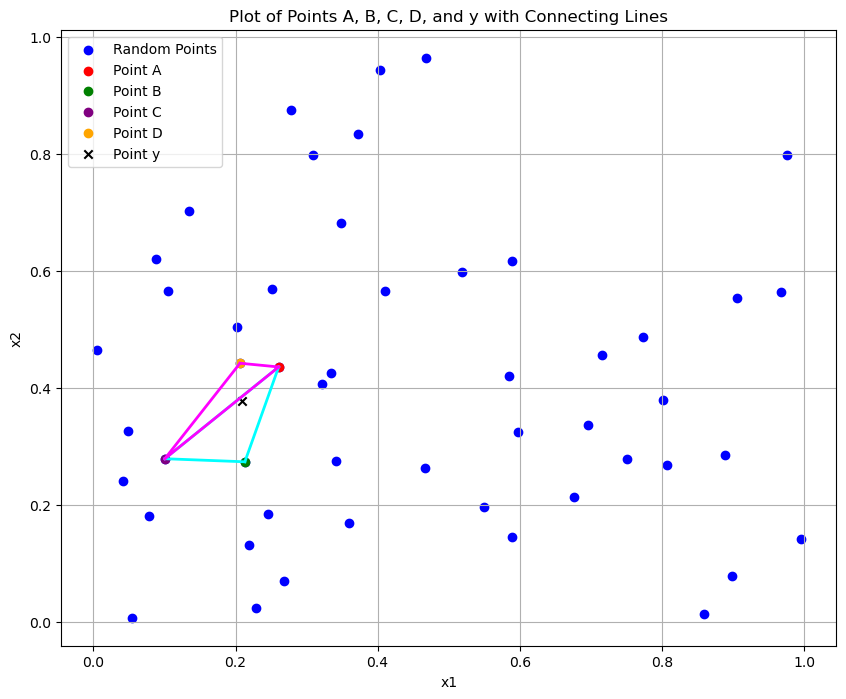

In [93]:
# Plot the points (using Copilot)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], label='Random Points', color='blue')
if not np.isnan(A).any():
    plt.scatter(A[0], A[1], label='Point A', color='red')
if not np.isnan(B).any():
    plt.scatter(B[0], B[1], label='Point B', color='green')
if not np.isnan(C).any():
    plt.scatter(C[0], C[1], label='Point C', color='purple')
if not np.isnan(D).any():
    plt.scatter(D[0], D[1], label='Point D', color='orange')
plt.scatter(y[0], y[1], label='Point y', color='black', marker='x')

# Connect the points A, B, C with one color
if not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
    plt.plot([A[0], B[0]], [A[1], B[1]], color='cyan', linestyle='-', linewidth=2)
    plt.plot([B[0], C[0]], [B[1], C[1]], color='cyan', linestyle='-', linewidth=2)
    plt.plot([C[0], A[0]], [C[1], A[1]], color='cyan', linestyle='-', linewidth=2)

# Connect the points C, D, A with another color
if not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
    plt.plot([C[0], D[0]], [C[1], D[1]], color='magenta', linestyle='-', linewidth=2)
    plt.plot([D[0], A[0]], [D[1], A[1]], color='magenta', linestyle='-', linewidth=2)
    plt.plot([A[0], C[0]], [A[1], C[1]], color='magenta', linestyle='-', linewidth=2)

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot of Points A, B, C, D, and y with Connecting Lines')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

We clearly see that y is inside the ABC triangle already here.

# Question 2
We now calculate the barycentric coordinates of the point y w.r.t. the triangles ABC and CDA

In [94]:
r1_ABC, r2_ABC, r3_ABC, r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(A,B,C,D,y)


y_ABC = r1_ABC*A + r2_ABC*B + r3_ABC*C
y_CDA = r1_CDA*C + r2_CDA*D + r3_CDA*A
print(y_ABC)
print(y_CDA)

print("Triangle ABC: ", is_in_triangle(r1_ABC, r2_ABC, r3_ABC))
print("Triangle CDA: ", is_in_triangle(r1_CDA, r2_CDA, r3_CDA))
    

[0.20901926 0.37774759]
[0.20901926 0.37774759]
Triangle ABC:  True
Triangle CDA:  False


So we are confirmed in that y is inside ABC.

# Question 3
We now have to approximate the value of f(y) using the barycentric coordinates.

In [95]:
print("Approximation: ", algorithm1(X, y))
print("True value: ", f(y))
print("Error: ", np.abs(algorithm1(X, y) - f(y)))

Approximation:  0.08405201731052576
True value:  0.0789565216259594
Error:  0.005095495684566367


# Question 4

In [96]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

for y in Y:
    print("y: ", y)
    print("Approximation: ", algorithm1(X, y))
    print("True value: ", f(y))
    try:
        print("Error: ", np.abs(algorithm1(X, y) - f(y)))
    except TypeError:
        print("Error: ", None)
    print("\n")


y:  (0.2, 0.2)
Approximation:  0.04032631372248057
True value:  0.04000000000000001
Error:  0.0003263137224805632


y:  (0.8, 0.2)
Approximation:  0.15874233999349835
True value:  0.16000000000000003
Error:  0.0012576600065016819


y:  (0.8, 0.8)
Approximation:  None
True value:  0.6400000000000001
Error:  None


y:  (0.8, 0.2)
Approximation:  0.15874233999349835
True value:  0.16000000000000003
Error:  0.0012576600065016819


y:  (0.5, 0.5)
Approximation:  0.2512901561119622
True value:  0.25
Error:  0.001290156111962204


